In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\mitra\Desktop\INNOMATICS(MITRABHANU PANDA)\DL\DATASETS\iris_modified.csv")

In [3]:
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
95,95,5.7,3.0,4.2,1.2,versicolor
96,96,5.7,2.9,4.2,1.3,versicolor
97,97,6.2,2.9,4.3,1.3,versicolor
98,98,5.1,2.5,3.0,1.1,versicolor


# <font color="red">EDA

In [4]:
df.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) # "Unnamed:0 column is not required,so drop this column."

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


## DATA CLEANING

In [7]:
df.info() # See some informations about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


#### From the above we see that there is no null values present in this dataset
#### And also see that all the datatypes are in correct form.

In [8]:
df.isna().sum() # To see the nan value

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
X=df.drop(['species'],axis=1) # Input features

In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [11]:
y=df['species'] # Target Feature

In [12]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
95    versicolor
96    versicolor
97    versicolor
98    versicolor
99    versicolor
Name: species, Length: 100, dtype: object

In [13]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

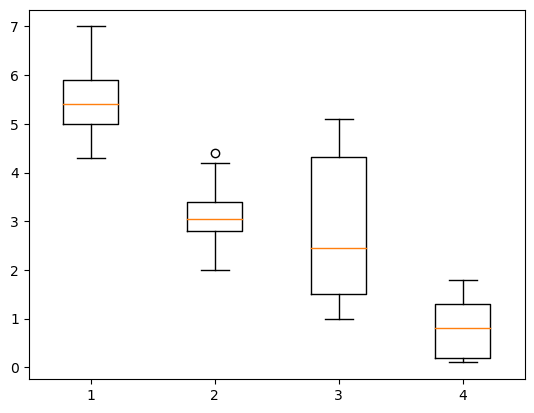

In [14]:
plt.boxplot(X)
plt.show()

#### Above boxplot show that 'sepal_width' column has outlier.

### <font color="blue"> 'sepal_width'

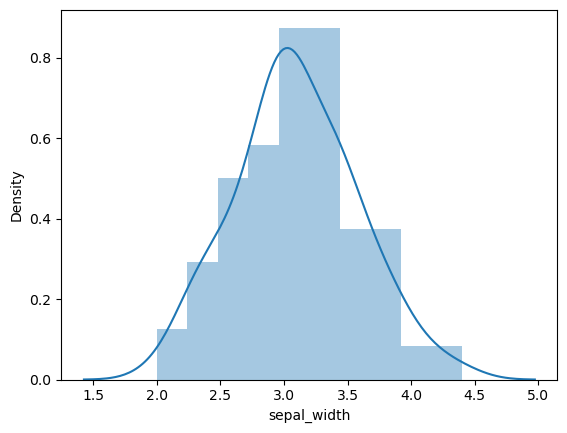

In [15]:
sns.distplot(X['sepal_width'])
plt.show()

In [16]:
X['sepal_width'].skew() 

0.16580763819728073

In [17]:
np.round(X['sepal_width'].skew()) 

0.0

#### Normally distributed

### IQR
    Rule-->
    iqr = q3-q1
    Lower Limit = q1-(1.5*iqr)
    Upper Limit = q3+(1.5*iqr)

In [18]:
q1=X['sepal_width'].quantile(0.25)

In [19]:
q1 # First Quantile

2.8

In [20]:
q3=X['sepal_width'].quantile(0.75)

In [21]:
q3 # Third Quantile

3.4

In [22]:
iqr=q3-q1

In [23]:
iqr

0.6000000000000001

In [24]:
l=q1-(1.5*iqr)

In [25]:
l # Lower Limit

1.8999999999999997

In [26]:
u=q3+(1.5*iqr)

In [27]:
u # Upper Limit

4.3

In [28]:
X['sepal_width']<l

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: sepal_width, Length: 100, dtype: bool

In [29]:
X[X['sepal_width']<l]

,sepal_length,sepal_width,petal_length,petal_width


In [30]:
X['sepal_width']>u

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: sepal_width, Length: 100, dtype: bool

In [31]:
X[X['sepal_width']>u]

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4


### <font color="green">TRIMMING

In [32]:
X[X['sepal_width']>u].index

Int64Index([15], dtype='int64')

In [33]:
X.drop(X[X['sepal_width']>u].index,axis=0)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


#### We have small datapoint so TRIMMING is not the good way for outlier detection

### <font color="green">CAPPING

In [34]:
(X['sepal_width']<l) | (X['sepal_width']>u)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: sepal_width, Length: 100, dtype: bool

In [35]:
X[(X['sepal_width']<l) | (X['sepal_width']>u)]

,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4


In [36]:
X['sepal_width']=X['sepal_width'].map(lambda x: l  if x < l else  u if x > u else x)

In [37]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


## DATA VISUALIZATION

### UNIVARIATE ANALYSIS

In [38]:
df['species'].value_counts()

setosa        50
versicolor    50
Name: species, dtype: int64

In [39]:
df['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

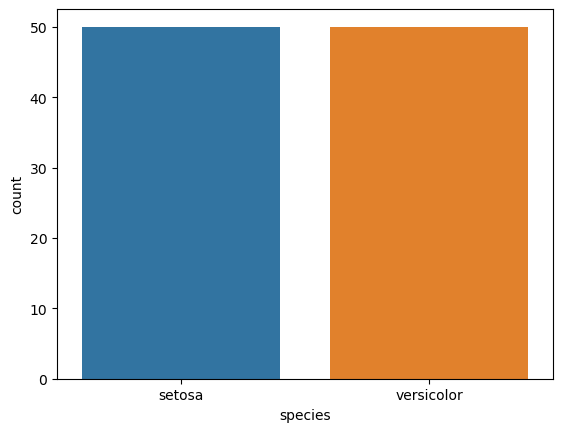

In [40]:
sns.countplot(x='species',data=df)
plt.show()

#### It is a balanced data

In [41]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

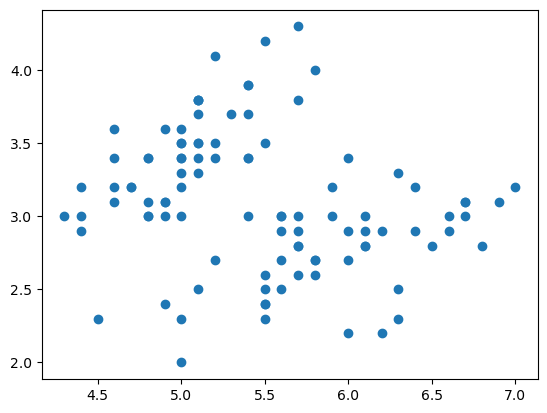

In [42]:
plt.scatter(x=X['sepal_length'],y=X['sepal_width'])
plt.show()

#### It show that the datapoints are sort of linearly separable  

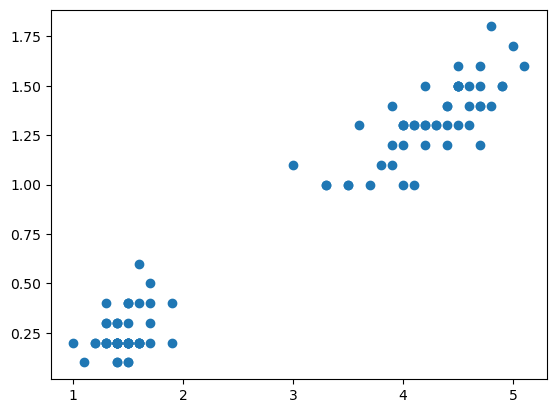

In [43]:
plt.scatter(x=X['petal_length'],y=X['petal_width'])
plt.show()

#### It show that datapoints are in clustering/grouping format

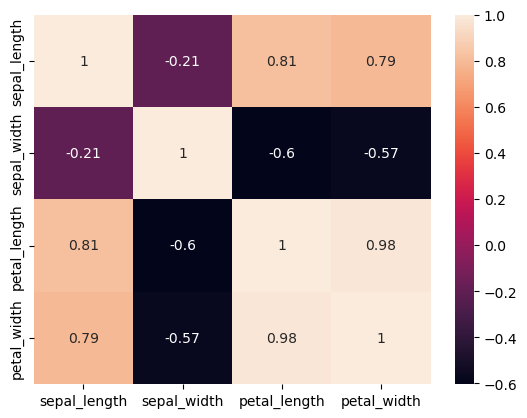

In [44]:
sns.heatmap(X.corr(),annot=True)
plt.show()

#### It show that  ('petal_length', 'petal_width') , ( 'sepal_length', 'petal_length') are highly correlated

# <font color="red">FEATURE SELECTION

### Feature Scaling of Categorical Feature
    In this dataset only one categorical feature is available, that is also the target variable.. So we use Label Encoding Technique.

In [45]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [46]:
lbl.fit_transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
ary=lbl.fit_transform(y)

In [48]:
lbl.classes_

array(['setosa', 'versicolor'], dtype=object)

In [49]:
df["flower"]=ary

In [50]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,flower
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,1
96,5.7,2.9,4.2,1.3,versicolor,1
97,6.2,2.9,4.3,1.3,versicolor,1
98,5.1,2.5,3.0,1.1,versicolor,1


In [51]:
y1=df["flower"]

In [52]:
y1 # Labeled Target Feature

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: flower, Length: 100, dtype: int32

### <font color="blue"> Feature Selection using Chi Square 

In [53]:
from sklearn.feature_selection import chi2 # Import the Chi-Square library

In [54]:
chi2(X,y1) # It show the values of chi_square.. 

(array([ 3.95220252,  3.47269206, 68.40968193, 37.09923664]),
 array([4.68100621e-02, 6.23896969e-02, 1.32823821e-16, 1.12267664e-09]))

In [55]:
chi_scores=chi2(X,y1) # Store the values in a variable.

<AxesSubplot:>

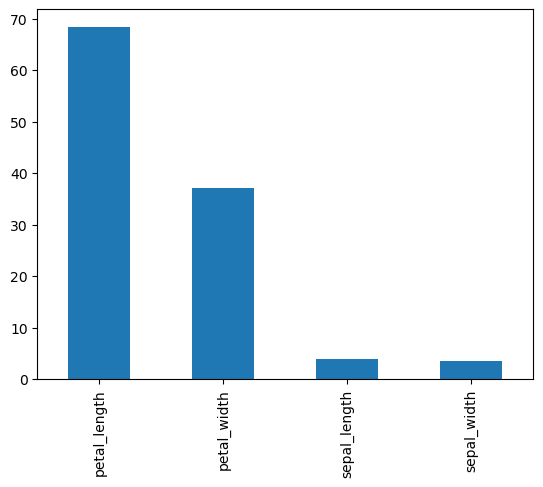

In [56]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

#### We know that if the chi_square value is high then feature is important...So from the above graph ('petal_length', 'petal_width') are important

### <font color="blue">Feature Selection using Recursive Feature Elimation

In [57]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [58]:
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=2)
rfe.fit(X,y1)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)

In [59]:
for i,col in zip(range(X.shape[1]),X.columns):
    print(f"{col} Selected = {rfe.support_[i]}, rank={rfe.ranking_[i]}")

sepal_length Selected = False, rank=3
sepal_width Selected = False, rank=2
petal_length Selected = True, rank=1
petal_width Selected = True, rank=1


#### from above we also see that ('petal_length', 'petal_width') are important

In [60]:
rfe.get_feature_names_out()

array(['petal_length', 'petal_width'], dtype=object)

#### from above  also show that ('petal_length', 'petal_width') are important

### From above experiments we conclude that  ('petal_length', 'petal_width') are important than ('sepal_length', 'sepal_width').. 
### So we keep the ('petal_length', 'petal_width') features and drop the ('sepal_length', 'sepal_width') features.

In [61]:
X.drop(['sepal_length', 'sepal_width'],axis=1,inplace=True)

In [62]:
X # Input Features

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
95,4.2,1.2
96,4.2,1.3
97,4.3,1.3
98,3.0,1.1


In [63]:
X1=np.array(X) # Convert the X into array format..because it is easy and fast to execute.

In [64]:
y1 # Labled Target Feature

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: flower, Length: 100, dtype: int32

In [65]:
Y1=np.array(y1)

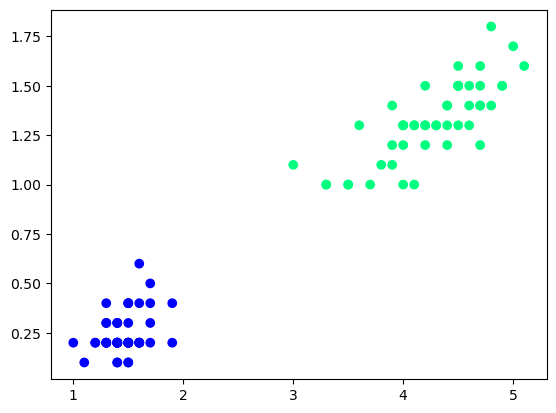

In [66]:
plt.scatter(x=X['petal_length'],y=X['petal_width'],c=y1,cmap="winter")
plt.show()

## <font color='brown'>Perceptron Trick Function

In [67]:
def mitra_perceptron(X,y):  # Create a function named as "mitra_perceptron"
    
    X=np.insert(X,0,1,axis=1) # Initilize the bias.
    
    weights=np.ones(X.shape[1]) # create a weights array with the size of "input feature's size"
    
    lr=0.1 # Learning rate 
    
    for i in range(1000):
        j=np.random.randint(0,100) # Randomly pick one point from the datapoints
        
        y_hat=step(np.dot(X[j],weights)) # Prediction of the "pickup random point"
        
        weights=weights+lr*(y[j]-y_hat)*X[j] # Update the weights
        
    return weights[0],weights[1:] # Return the intercept & Coefficients

In [68]:
# create a step function. If we give a numper to step function--> if this number >0 it return me 1 else 0
def step(z): 
    return 1 if z>0 else 0

In [69]:
intercept,coeff=mitra_perceptron(X1,Y1)

In [70]:
print(coeff)
print(intercept)

[-0.08  1.03]
-0.4999999999999999


In [71]:
m= -(coeff[0]/coeff[1]) # Calculate the m

b= -(intercept/coeff[1]) # calculate the b

In [72]:
print(m)
print(b)

0.0776699029126216
0.4854368932038835


In [73]:
x_ip=np.linspace(-5,5,100)
y_ip=m*x_ip+b

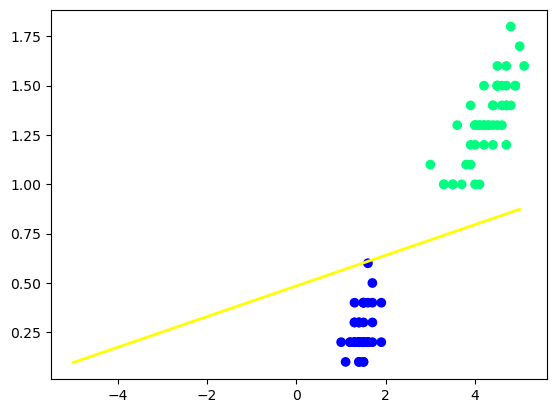

In [74]:
plt.plot(x_ip,y_ip,color="yellow",linewidth=2)
plt.scatter(x=X1[:,0],y=X1[:,1],c=Y1,cmap="winter")
plt.show()


### 

### 

# <font color="red"> Multicollinearity 
        ('petal_length', 'petal_width') this features are highly correlate with each other..so multicollinearity issue will be occured.

### <font color='green'>VIF(Variance Inflation Factor) Method

In [75]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,flower
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,1
96,5.7,2.9,4.2,1.3,versicolor,1
97,6.2,2.9,4.3,1.3,versicolor,1
98,5.1,2.5,3.0,1.1,versicolor,1


In [76]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'flower'],
      dtype='object')

In [77]:
df.drop(['species'],axis=1,inplace=True)

In [78]:
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [79]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,flower
sepal_length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal_width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal_length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal_width,0.789608,-0.570883,0.979322,1.000000,0.960307
flower,0.728290,-0.690684,0.969990,0.960307,1.000000


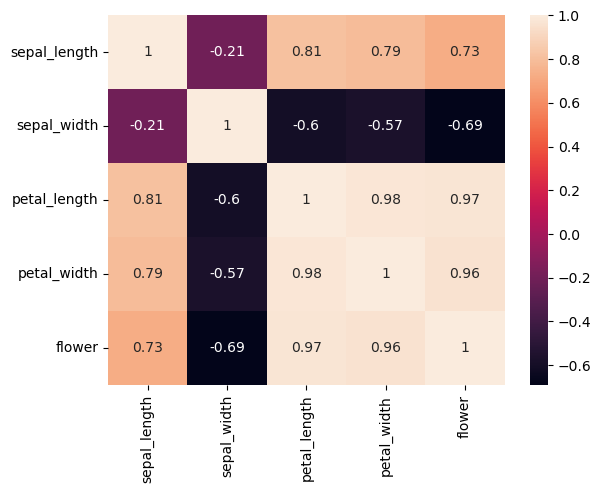

In [80]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
def cal_vif(dataset):
    vif=pd.DataFrame()
    vif["features"]=dataset.columns
    
    # Take all the column one by one give the vif values
    vif['VIF_VALUE']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    
    
    return (vif)

In [83]:
features=df.iloc[:,:-1]
cal_vif(features)

,features,VIF_VALUE
0,sepal_length,247.103695
1,sepal_width,104.198483
2,petal_length,177.772929
3,petal_width,71.731933


In [84]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,flower
sepal_length,1.000000,-0.205926,0.812458,0.789608,0.728290
sepal_width,-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal_length,0.812458,-0.602663,1.000000,0.979322,0.969990
petal_width,0.789608,-0.570883,0.979322,1.000000,0.960307
flower,0.728290,-0.690684,0.969990,0.960307,1.000000


In [85]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'], dtype='object')

In [86]:
df1=df.drop(['sepal_width','petal_length'],axis=1)

In [87]:
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [88]:
df1

,sepal_length,petal_width,flower
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0
...,...,...,...
95,5.7,1.2,1
96,5.7,1.3,1
97,6.2,1.3,1
98,5.1,1.1,1


In [89]:
df2=df.drop(['sepal_width','petal_width'],axis=1)

In [90]:
df2

,sepal_length,petal_length,flower
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


In [91]:
features=df2.iloc[:,:-1]
cal_vif(features)  # 1st case

,features,VIF_VALUE
0,sepal_length,7.333903
1,petal_length,7.333903


In [92]:
features=df1.iloc[:,:-1]
cal_vif(features) # 2nd case

,features,VIF_VALUE
0,sepal_length,3.867601
1,petal_width,3.867601


#### In the 1st case vif_value is greater than 5,but in the 2nd case vif_value is less than 5.. So that we will take the 2nd case.

In [93]:
df1.corr()

,sepal_length,petal_width,flower
sepal_length,1.000000,0.789608,0.728290
petal_width,0.789608,1.000000,0.960307
flower,0.728290,0.960307,1.000000


In [94]:
df2.corr()

,sepal_length,petal_length,flower
sepal_length,1.000000,0.812458,0.72829
petal_length,0.812458,1.000000,0.96999
flower,0.728290,0.969990,1.00000


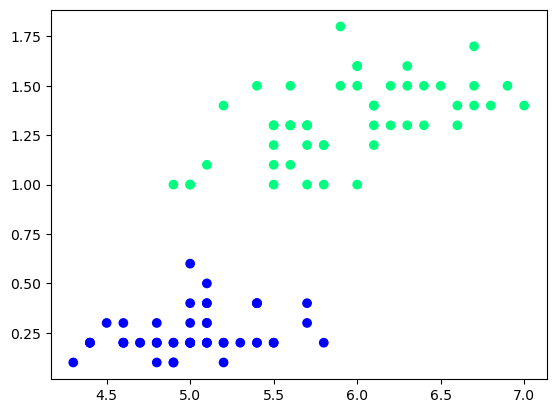

In [95]:
plt.scatter(x=df1['sepal_length'],y=df1['petal_width'],c=df1['flower'],cmap="winter")
plt.show()

### 

In [96]:
ip=df1.drop(['flower'],axis=1)

In [97]:
ip

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
95,5.7,1.2
96,5.7,1.3
97,6.2,1.3
98,5.1,1.1


In [98]:
ip1=np.array(ip)

In [99]:
op=df1['flower']

In [100]:
op

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: flower, Length: 100, dtype: int32

In [101]:
op1=np.array(op)

In [102]:
intercept,coeff=mitra_perceptron(ip1,op1)

In [103]:
print(coeff)
print(intercept)

[-0.37  1.97]
0.5000000000000001


In [104]:
m= -(coeff[0]/coeff[1]) # Calculate the m

b= -(intercept/coeff[1]) # calculate the b

In [105]:
print(m)
print(b)

0.18781725888324852
-0.2538071065989848


In [106]:
x_ip=np.linspace(-9,9,100)
y_ip=m*x_ip+b

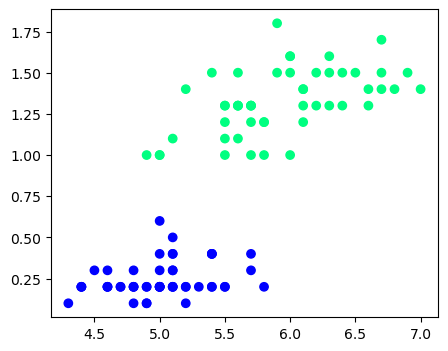

In [107]:
plt.figure(figsize=(5,4))
plt.scatter(x=ip1[:,0],y=ip1[:,1],c=op1,cmap="winter")

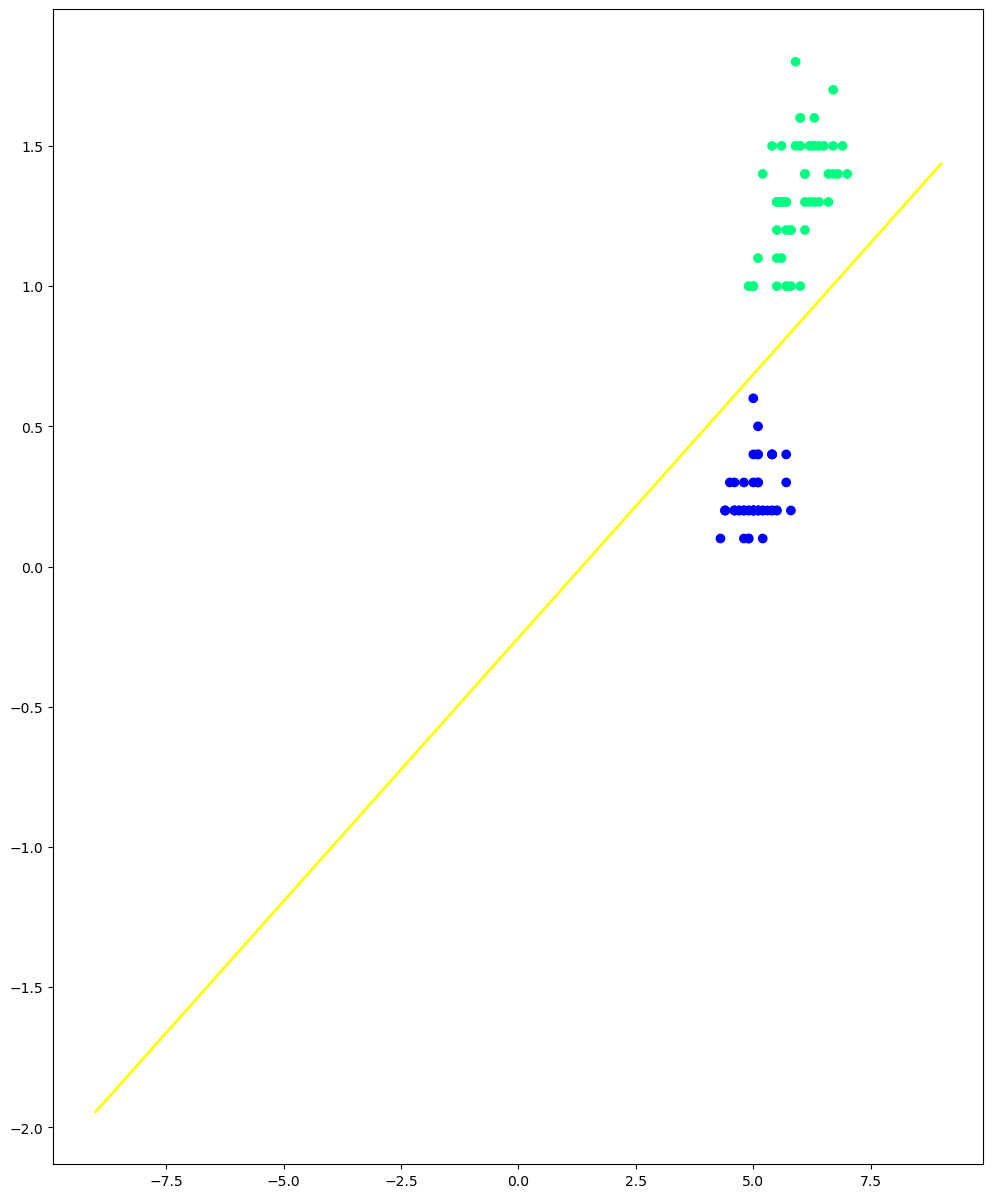

In [108]:
plt.figure(figsize=(12,15))
plt.plot(x_ip,y_ip,color="yellow",linewidth=2)
plt.scatter(x=ip1[:,0],y=ip1[:,1],c=op1,cmap="winter")
plt.show()